In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

my_csv = 'US_Accidents_March23.csv'
data = pd.read_csv(my_csv)

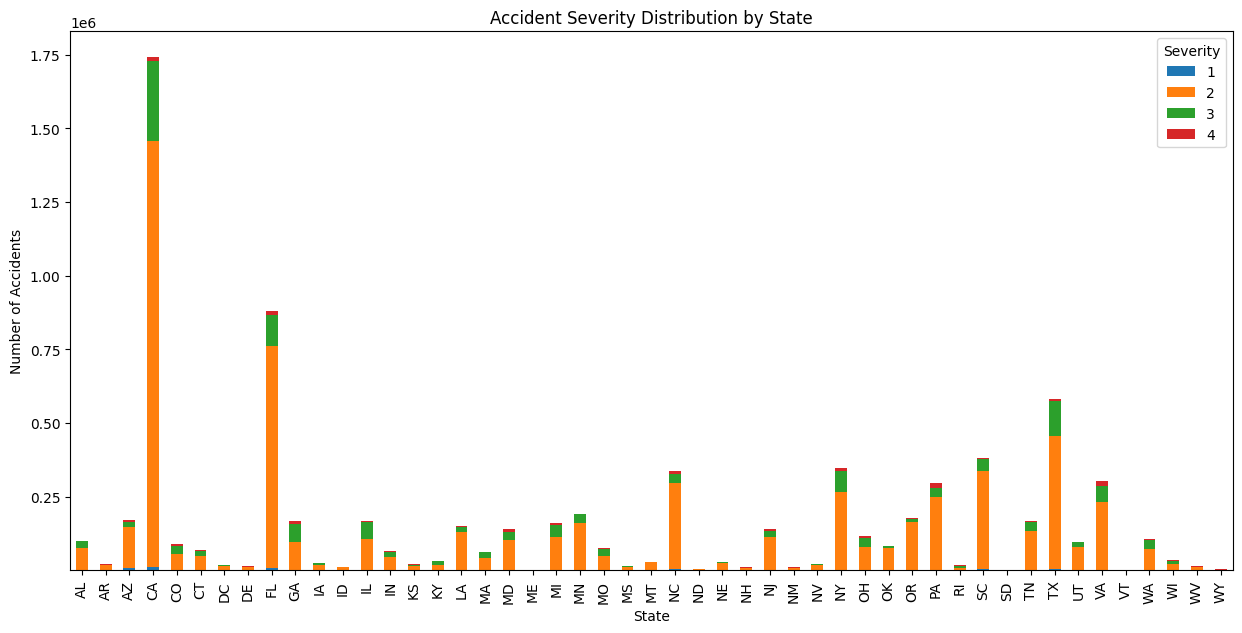

In [19]:
# Question 1:
# First we group the data by 'State' and 'Severity' and count the occurrences
severity_by_state = data.groupby(['State', 'Severity']).size().unstack(fill_value=0)

# We will display the data by plotting the data as a stacked bar chart
# 'kind=bar' creates a bar chart
# 'stacked=True' stacks the severity levels on top of each other
# 'figsize' sets the size of the figure
severity_by_state.plot(kind='bar', stacked=True, figsize=(15, 7))

# we make the title and labels for the chart for readability
plt.title('Accident Severity Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Next we add a legend to explain which colors represent which severity level
plt.legend(title='Severity')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q1chart.png', dpi=300)

# Lastly, we display the plot
plt.show()

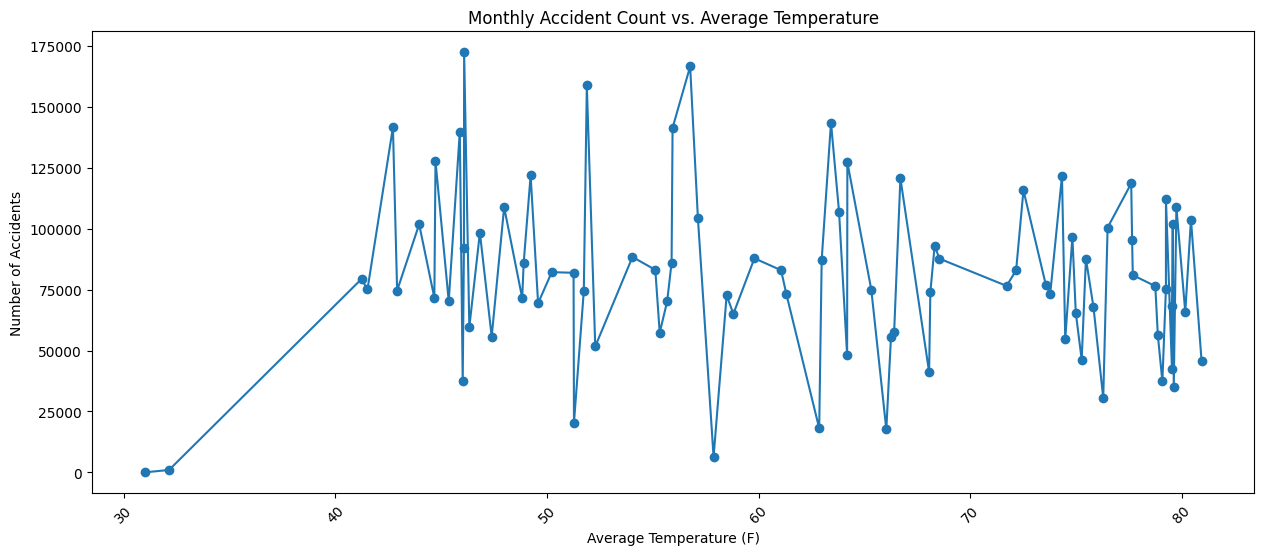

In [20]:
# Question 2: Correlation between weather conditions and the number of accidents

data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# here we create a new column that just contains the month and year for grouping.
data['Month_Year'] = data['Start_Time'].dt.to_period('M')

# we the need to group the data by this new 'Month_Year' column.
# then we count the number of accidents and calculate the average temperature for each group.
monthly_stats = data.groupby('Month_Year').agg({
    'Start_Time': 'size',  # Count the number of accidents as each row represents one accident.
    'Temperature(F)': 'mean'  # Calculate the average temperature.
}).rename(columns={'Start_Time': 'Accident_Count'})

# we need to reset the index so that 'Month_Year' becomes a column and can be used in a plot.
monthly_stats.reset_index(inplace=True)

# then we sort the DataFrame by average temperature.
monthly_stats_sorted = monthly_stats.sort_values('Temperature(F)')

# next, we plot the line graph with x being the average temperature and y being the accident count.
plt.figure(figsize=(15, 6))
plt.plot(monthly_stats_sorted['Temperature(F)'], monthly_stats_sorted['Accident_Count'], marker='o')

# adding labels and title to the plot as usual for better readability
plt.title('Monthly Accident Count vs. Average Temperature')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # i need to rotate the x-axis labels for better readability.

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q2chart.png', dpi=300)

plt.show()

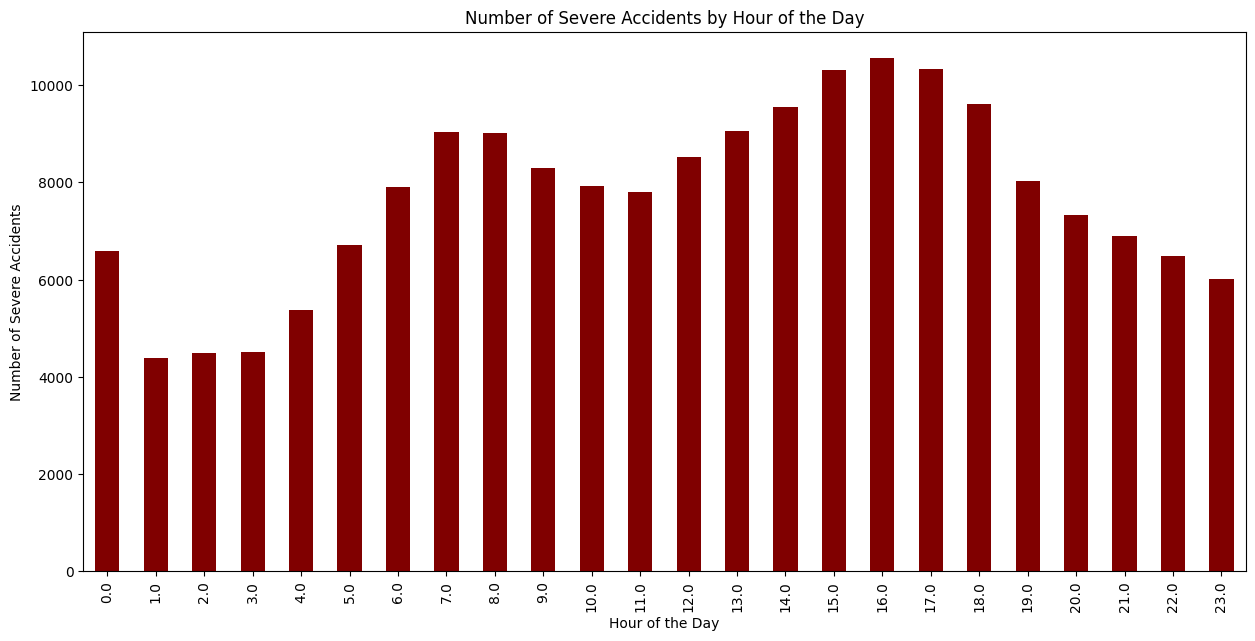

In [21]:
# Question 3: Discovering the times when the most severe accidents happen.

# First, we need to make sure the 'Start_Time' column is in a format we can work with. 
# We then convert it to datetime, and if there are any dates that don't fit the format, 
# we then turn them into 'NaT' (not-a-time) so they don't cause errors.
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# Next, we extract just the hour from the 'Start_Time' because we want to see 
# what time of day accidents happen, not the exact minute.
data['Hour_of_Accident'] = data['Start_Time'].dt.hour

# Now, we're focusing on severe accidents. We assume 'Severity' level 4 means 'most severe', 
# so we filter to get only those records.
severe_accidents = data[data['Severity'] == 4]

# With our filtered data, we count how many severe accidents occur at each hour of the day.
accidents_by_hour = severe_accidents.groupby('Hour_of_Accident').size()

# It's time to visualize our data. We create a bar chart, setting the size to make it easy to read. 
# We choose a color that stands out, 'maroon', to draw attention to the severe accidents.
accidents_by_hour.plot(kind='bar', figsize=(15, 7), color='maroon')

# We add a title and labels to our chart, so anyone who looks at it can understand what it shows.
plt.title('Number of Severe Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Severe Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q3chart.png', dpi=300)

# Finally, we display our chart. This line makes sure that our plot actually shows up in the notebook.
plt.show()

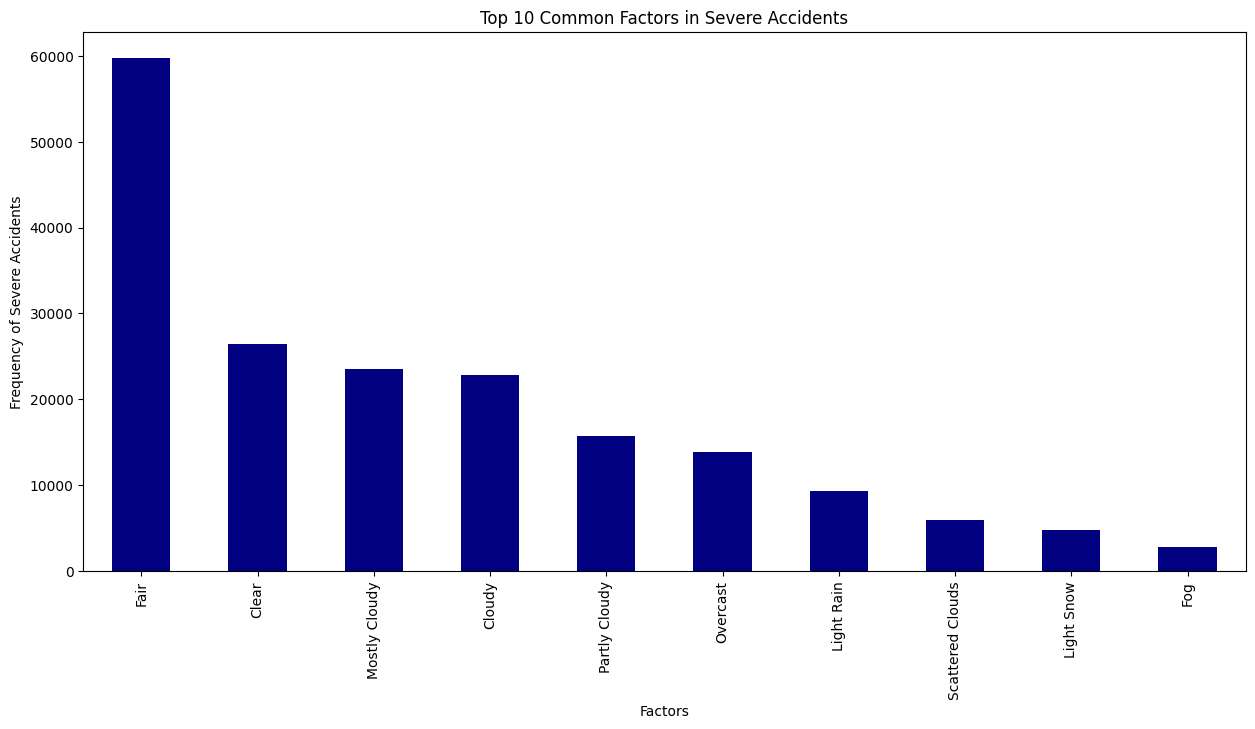

In [22]:
# Question 4: Identifying the common factors in the most severe accidents.

# we select only the severe accidents for analysis
severe_accidents = data[data['Severity'] == 4]

# Now we examine the common factors in these severe accidents.
# common factors will include weather conditions for this example
common_factors = severe_accidents['Weather_Condition'].value_counts().head(10)

# we visualize these common factors using a bar chart.
common_factors.plot(kind='bar', figsize=(15, 7), color='navy')

# Add titles and labels as usual
plt.title('Top 10 Common Factors in Severe Accidents')
plt.xlabel('Factors')
plt.ylabel('Frequency of Severe Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q4chart.png', dpi=300)

# display the plot
plt.show()

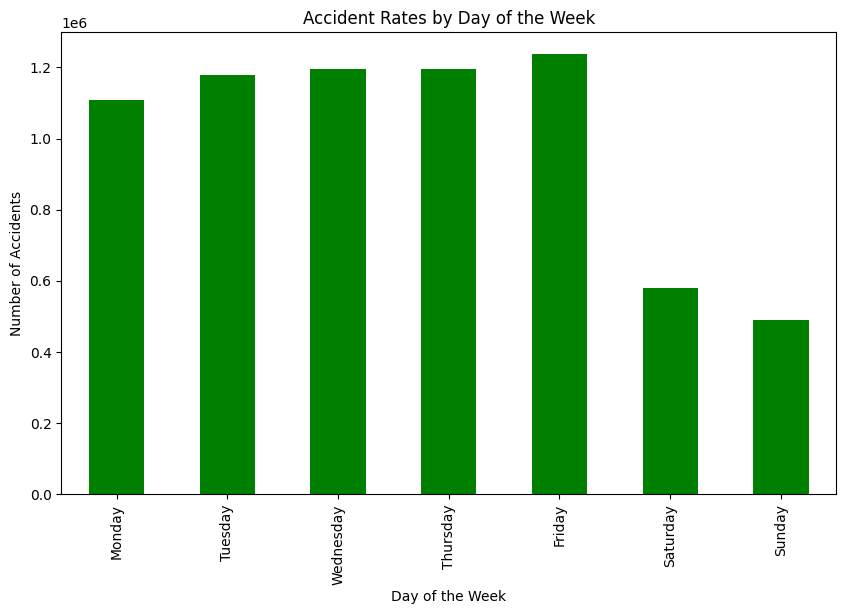

In [23]:
# question 5: examining accident rates throughout the week.

# first, convert the 'Start_Time' column to datetime format for easier manipulation.
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# extract the day of the week from 'Start_Time' and create a new column 'Day_of_Week'.
data['Day_of_Week'] = data['Start_Time'].dt.day_name()

# count the number of accidents for each day of the week.
accidents_by_weekday = data['Day_of_Week'].value_counts()

# sorting the count by the order of days in the week for logical ordering in the plot.
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accidents_by_weekday = accidents_by_weekday.reindex(ordered_days)

# plotting a bar chart to visualize the number of accidents for each day of the week.
accidents_by_weekday.plot(kind='bar', color='green', figsize=(10, 6))

# adding a title and axis labels for better understanding of the plot.
plt.title('Accident Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q5chart.png', dpi=300)

# displaying the plot.
plt.show()

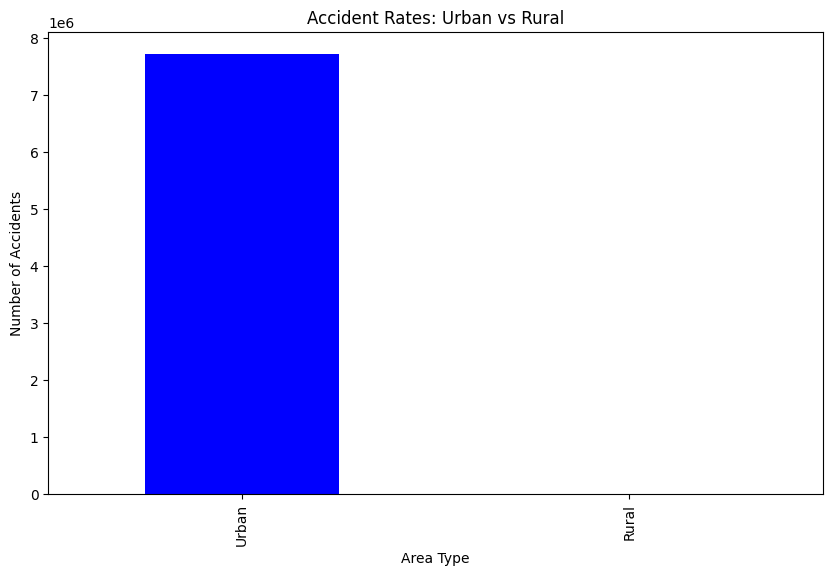

In [24]:
# question 6: analyzing accident rates based on urban and rural classifications.

# first, we need to classify each accident as either urban or rural.
# here, we assume that accidents with a city name are urban and those without are rural.
# we create a new column 'Area_Type' to store this classification.
data['Area_Type'] = data['City'].apply(lambda x: 'Urban' if pd.notna(x) else 'Rural')

# then, we count the number of accidents in each classification.
accident_counts = data['Area_Type'].value_counts()

# now, we plot these counts in a bar chart to visualize the comparison.
accident_counts.plot(kind='bar', color='blue', figsize=(10, 6))

# adding title and labels for clarity.
plt.title('Accident Rates: Urban vs Rural')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q6chart.png', dpi=300)

# finally, displaying the plot.
plt.show()

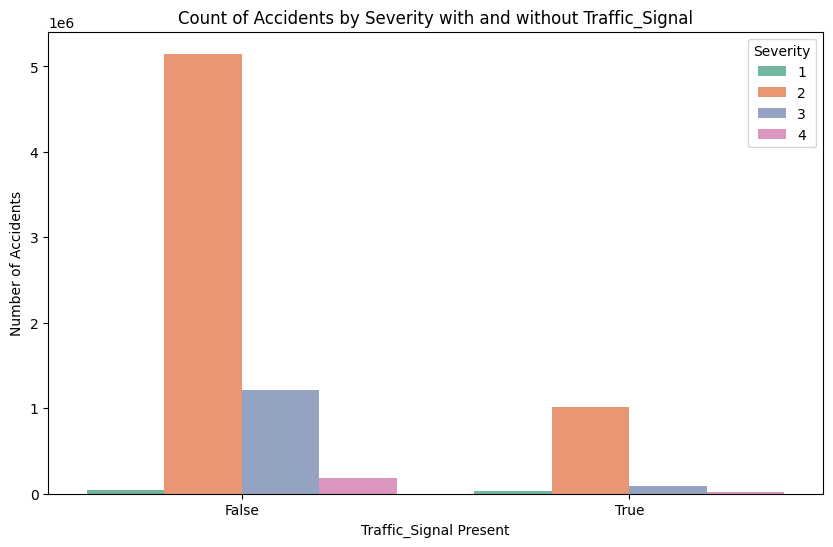

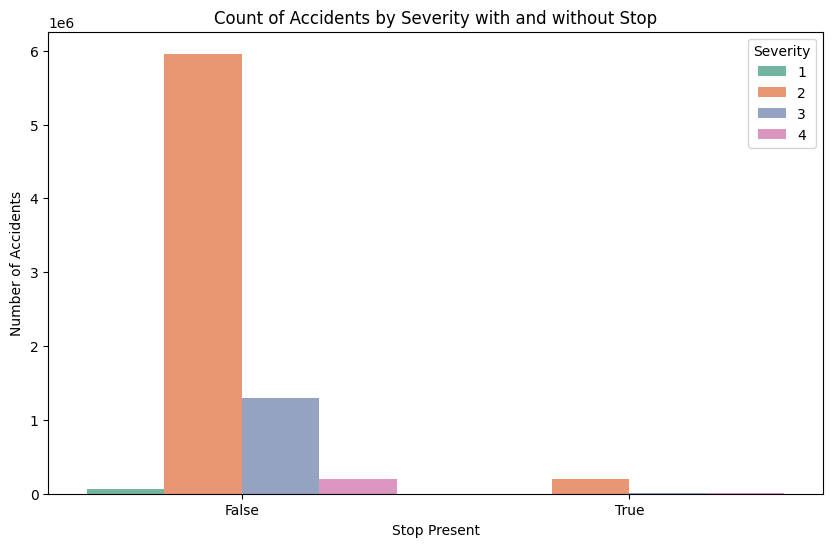

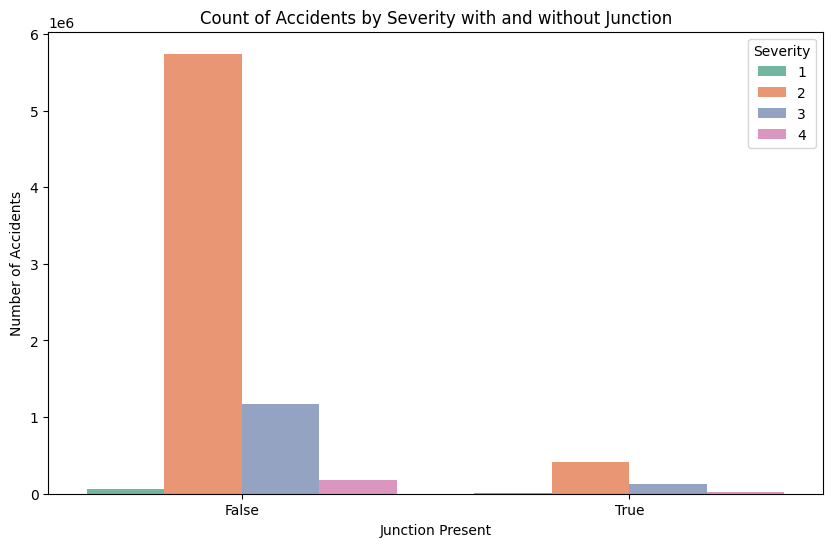

In [25]:
# question 7: exploring the impact of traffic control features on accident severity.

# we'll use seaborn's countplot to show the counts of accidents by severity for each traffic feature.
traffic_features = ['Traffic_Signal', 'Stop', 'Junction']

# creating a subplot for each traffic feature.
for feature in traffic_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Severity', data=data, palette='Set2')
    
    # adding title and axis labels for better understanding of the plot.
    plt.title(f'Count of Accidents by Severity with and without {feature}')
    plt.xlabel(f'{feature} Present')
    plt.ylabel('Number of Accidents')
    
    # adding a legend to explain the severity levels.
    plt.legend(title='Severity')

    plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q7chart.png', dpi=300)

    # displaying the plot.
    plt.show()

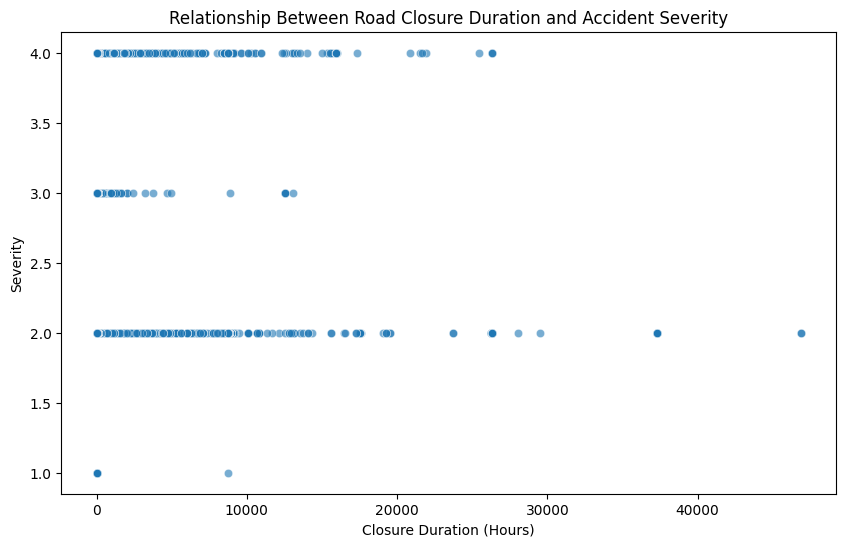

In [31]:
# question 8: exploring the relationship between road closure duration and accident severity.

# converting 'Start_Time' and 'End_Time' to datetime if not already done.
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], errors='coerce')

# calculating the duration of road closure in hours and storing it in a new column 'Closure_Duration'.
data['Closure_Duration'] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 3600

# plotting a scatter plot to observe the relationship between closure duration and severity.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Closure_Duration', y='Severity', data=data, alpha=0.6)

# setting the axis labels and title.
plt.xlabel('Closure Duration (Hours)')
plt.ylabel('Severity')
plt.title('Relationship Between Road Closure Duration and Accident Severity')

# displaying the plot.
plt.show()

# it seems like most accidents result in road closures that are relatively short in duration.

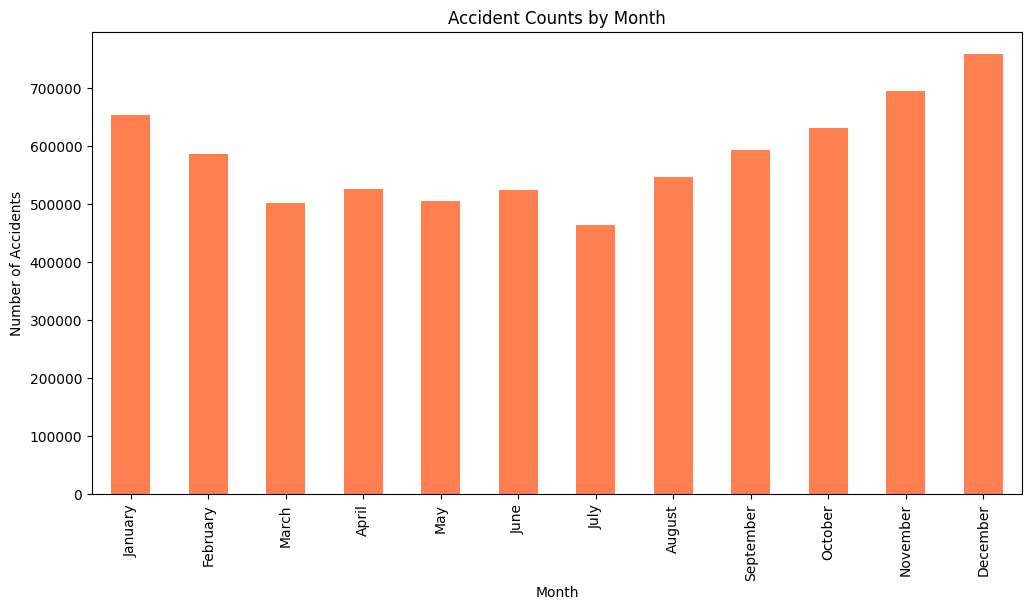

In [27]:
# question 9: analyzing seasonal trends in accident occurrences.

# first, ensure the 'Start_Time' column is in datetime format.
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# extract the month from the 'Start_Time' to find out when accidents are more common.
data['Month'] = data['Start_Time'].dt.month_name()

# count the number of accidents per month.
accidents_by_month = data['Month'].value_counts().sort_index()

# since value_counts() doesn't guarantee the months will be in order, let's sort them.
# create a categorical type with the categories (months) in the order we want, and then sort.
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=months_order, ordered=True)
accidents_by_month = data['Month'].value_counts().sort_index()

# plotting a bar chart to visualize the number of accidents per month.
accidents_by_month.plot(kind='bar', figsize=(12, 6), color='coral')

# adding title and labels to the plot.
plt.title('Accident Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q9chart.png', dpi=300)

# displaying the plot.
plt.show()

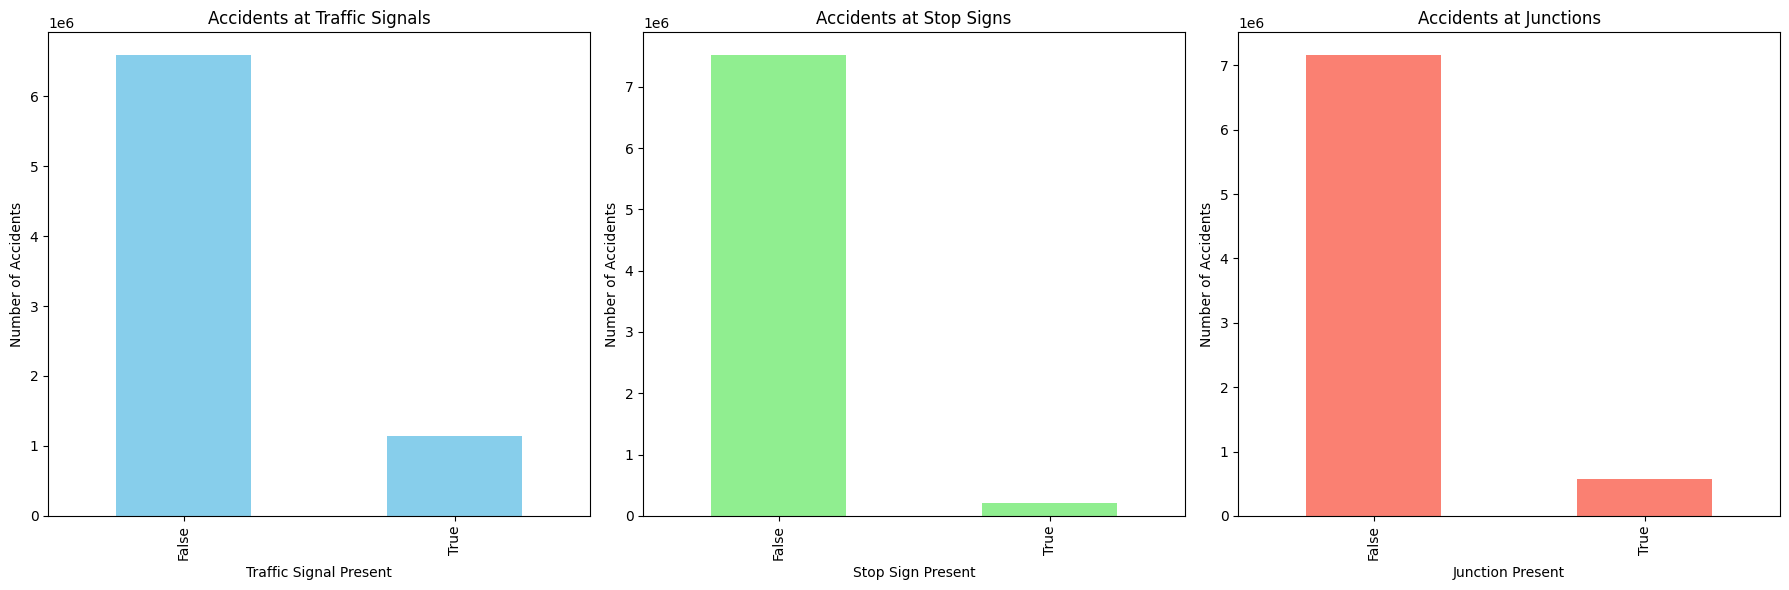

In [28]:
# question 10: comparing accident frequency at locations with traffic signals, stop signs, and junctions.

# count the number of accidents where traffic signals, stop signs, and junctions are present.
traffic_signal_accidents = data['Traffic_Signal'].value_counts()
stop_sign_accidents = data['Stop'].value_counts()
junction_accidents = data['Junction'].value_counts()

# setting up the matplotlib figure for a subplot of 1 row by 3 columns.
plt.figure(figsize=(18, 6))

# subplot for traffic signals.
plt.subplot(1, 3, 1)
traffic_signal_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents at Traffic Signals')
plt.xlabel('Traffic Signal Present')
plt.ylabel('Number of Accidents')

# subplot for stop signs.
plt.subplot(1, 3, 2)
stop_sign_accidents.plot(kind='bar', color='lightgreen')
plt.title('Accidents at Stop Signs')
plt.xlabel('Stop Sign Present')
plt.ylabel('Number of Accidents')

# subplot for junctions.
plt.subplot(1, 3, 3)
junction_accidents.plot(kind='bar', color='salmon')
plt.title('Accidents at Junctions')
plt.xlabel('Junction Present')
plt.ylabel('Number of Accidents')

plt.savefig(r'C:\Users\Velas\Desktop\US-Accidents-from-2016-to-2023\Q10chart.png', dpi=300)

# displaying the plot with a tight layout.
plt.tight_layout()
plt.show()